# California House Prices Exploratory Data Analysis & Regression Modeling

Data Link - https://www.kaggle.com/datasets/camnugent/california-housing-prices

About the Data:

The data pertains to the houses found in a given California district and some summary stats about them based on the 1990 census data. Be warned the data aren't cleaned so there are some preprocessing steps required! The columns are as follows, their names are pretty self explanitory:

longitude

latitude

housingmedianage

total_rooms

total_bedrooms

population

households

median_income

medianhousevalue

ocean_proximity

In [1]:
#importing packages and required data for the Analysis
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

In [2]:
#loading the data to a DF

hpc = pd.read_csv('/Users/srujanmara/Desktop/Udemy/Git/California_House_Price EDA/housing.csv')
hpc

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0        -122.23     37.88                41.0        880.0           129.0   
1        -122.22     37.86                21.0       7099.0          1106.0   
2        -122.24     37.85                52.0       1467.0           190.0   
3        -122.25     37.85                52.0       1274.0           235.0   
4        -122.25     37.85                52.0       1627.0           280.0   
...          ...       ...                 ...          ...             ...   
20635    -121.09     39.48                25.0       1665.0           374.0   
20636    -121.21     39.49                18.0        697.0           150.0   
20637    -121.22     39.43                17.0       2254.0           485.0   
20638    -121.32     39.43                18.0       1860.0           409.0   
20639    -121.24     39.37                16.0       2785.0           616.0   

       population  households  median_income  median_house_value  \
0           322.0       126.0         8.3252            452600.0   
1          2401.0      1138.0         8.3014            358500.0   
2           496.0       177.0         7.2574            352100.0   
3           558.0       219.0         5.6431            341300.0   
4           565.0       259.0         3.8462            342200.0   
...           ...         ...            ...                 ...   
20635       845.0       330.0         1.5603             78100.0   
20636       356.0       114.0         2.5568             77100.0   
20637      1007.0       433.0         1.7000             92300.0   
20638       741.0       349.0         1.8672             84700.0   
20639      1387.0       530.0         2.3886             89400.0   

      ocean_proximity  
0            NEAR BAY  
1            NEAR BAY  
2            NEAR BAY  
3            NEAR BAY  
4            NEAR BAY  
...               ...  
20635          INLAND  
20636          INLAND  
20637          INLAND  
20638          INLAND  
20639          INLAND  

[20640 rows x 10 columns]

In [3]:
hpc.head() #Top 5 rows of the data

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25     37.85                52.0       1274.0           235.0   
4    -122.25     37.85                52.0       1627.0           280.0   

   population  households  median_income  median_house_value ocean_proximity  
0       322.0       126.0         8.3252            452600.0        NEAR BAY  
1      2401.0      1138.0         8.3014            358500.0        NEAR BAY  
2       496.0       177.0         7.2574            352100.0        NEAR BAY  
3       558.0       219.0         5.6431            341300.0        NEAR BAY  
4       565.0       259.0         3.8462            342200.0        NEAR BAY

In [4]:
hpc.info() #information about the columns % the dtype

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [5]:
hpc.describe() #an understanding of the data

longitude      latitude  housing_median_age   total_rooms  \
count  20640.000000  20640.000000        20640.000000  20640.000000   
mean    -119.569704     35.631861           28.639486   2635.763081   
std        2.003532      2.135952           12.585558   2181.615252   
min     -124.350000     32.540000            1.000000      2.000000   
25%     -121.800000     33.930000           18.000000   1447.750000   
50%     -118.490000     34.260000           29.000000   2127.000000   
75%     -118.010000     37.710000           37.000000   3148.000000   
max     -114.310000     41.950000           52.000000  39320.000000   

       total_bedrooms    population    households  median_income  \
count    20433.000000  20640.000000  20640.000000   20640.000000   
mean       537.870553   1425.476744    499.539680       3.870671   
std        421.385070   1132.462122    382.329753       1.899822   
min          1.000000      3.000000      1.000000       0.499900   
25%        296.000000    787.000000    280.000000       2.563400   
50%        435.000000   1166.000000    409.000000       3.534800   
75%        647.000000   1725.000000    605.000000       4.743250   
max       6445.000000  35682.000000   6082.000000      15.000100   

       median_house_value  
count        20640.000000  
mean        206855.816909  
std         115395.615874  
min          14999.000000  
25%         119600.000000  
50%         179700.000000  
75%         264725.000000  
max         500001.000000

In [6]:
hpc.describe().T #Transpose of the desciption

count           mean            std         min  \
longitude           20640.0    -119.569704       2.003532   -124.3500   
latitude            20640.0      35.631861       2.135952     32.5400   
housing_median_age  20640.0      28.639486      12.585558      1.0000   
total_rooms         20640.0    2635.763081    2181.615252      2.0000   
total_bedrooms      20433.0     537.870553     421.385070      1.0000   
population          20640.0    1425.476744    1132.462122      3.0000   
households          20640.0     499.539680     382.329753      1.0000   
median_income       20640.0       3.870671       1.899822      0.4999   
median_house_value  20640.0  206855.816909  115395.615874  14999.0000   

                            25%          50%           75%          max  
longitude             -121.8000    -118.4900    -118.01000    -114.3100  
latitude                33.9300      34.2600      37.71000      41.9500  
housing_median_age      18.0000      29.0000      37.00000      52.0000  
total_rooms           1447.7500    2127.0000    3148.00000   39320.0000  
total_bedrooms         296.0000     435.0000     647.00000    6445.0000  
population             787.0000    1166.0000    1725.00000   35682.0000  
households             280.0000     409.0000     605.00000    6082.0000  
median_income            2.5634       3.5348       4.74325      15.0001  
median_house_value  119600.0000  179700.0000  264725.00000  500001.0000

In [7]:
hpc.shape #This data has 20640 rows and 10 columns

(20640, 10)

Data Cleaning
- Checking how many null values are in the data

In [8]:
hpc.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

as per the above data we can see that there are 207 null values in the total_bedrooms column

In [9]:
hpc.isnull().sum().sum()

207

Total null values are only 207

2.Checking for Duplicates in dataset

In [10]:
hpc.duplicated().sum()

0

There are no duplicate values in the data.

3. Dropping the null values

In [11]:
hpc.dropna(inplace=True)

Check the Null values

In [12]:
hpc.isnull().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64

In [13]:
hpc.shape

(20433, 10)

Dropped the null values & we can see the reduced rows when compared to previous dataset

In [14]:
hpc

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0        -122.23     37.88                41.0        880.0           129.0   
1        -122.22     37.86                21.0       7099.0          1106.0   
2        -122.24     37.85                52.0       1467.0           190.0   
3        -122.25     37.85                52.0       1274.0           235.0   
4        -122.25     37.85                52.0       1627.0           280.0   
...          ...       ...                 ...          ...             ...   
20635    -121.09     39.48                25.0       1665.0           374.0   
20636    -121.21     39.49                18.0        697.0           150.0   
20637    -121.22     39.43                17.0       2254.0           485.0   
20638    -121.32     39.43                18.0       1860.0           409.0   
20639    -121.24     39.37                16.0       2785.0           616.0   

       population  households  median_income  median_house_value  \
0           322.0       126.0         8.3252            452600.0   
1          2401.0      1138.0         8.3014            358500.0   
2           496.0       177.0         7.2574            352100.0   
3           558.0       219.0         5.6431            341300.0   
4           565.0       259.0         3.8462            342200.0   
...           ...         ...            ...                 ...   
20635       845.0       330.0         1.5603             78100.0   
20636       356.0       114.0         2.5568             77100.0   
20637      1007.0       433.0         1.7000             92300.0   
20638       741.0       349.0         1.8672             84700.0   
20639      1387.0       530.0         2.3886             89400.0   

      ocean_proximity  
0            NEAR BAY  
1            NEAR BAY  
2            NEAR BAY  
3            NEAR BAY  
4            NEAR BAY  
...               ...  
20635          INLAND  
20636          INLAND  
20637          INLAND  
20638          INLAND  
20639          INLAND  

[20433 rows x 10 columns]

In [15]:
#Now Labeling the column

In [16]:
hpc['ocean_proximity']

0        NEAR BAY
1        NEAR BAY
2        NEAR BAY
3        NEAR BAY
4        NEAR BAY
           ...   
20635      INLAND
20636      INLAND
20637      INLAND
20638      INLAND
20639      INLAND
Name: ocean_proximity, Length: 20433, dtype: object

In [17]:
hpc['ocean_proximity'].unique()

array(['NEAR BAY', '<1H OCEAN', 'INLAND', 'NEAR OCEAN', 'ISLAND'],
      dtype=object)

we have 5 unique values in the label column

Now we are heading to Statistical Analysis

In [18]:
hpc.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20433 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20433 non-null  float64
 1   latitude            20433 non-null  float64
 2   housing_median_age  20433 non-null  float64
 3   total_rooms         20433 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20433 non-null  float64
 6   households          20433 non-null  float64
 7   median_income       20433 non-null  float64
 8   median_house_value  20433 non-null  float64
 9   ocean_proximity     20433 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.7+ MB


There are 9 float columns & 1 object column

we are seperating the numerical and categorical

In [19]:
#checking the datatype of the label column

In [20]:
hpc['ocean_proximity'].dtype

dtype('O')

# Categorical feature

In [21]:
cat_col = hpc['ocean_proximity']
cat_col

0        NEAR BAY
1        NEAR BAY
2        NEAR BAY
3        NEAR BAY
4        NEAR BAY
           ...   
20635      INLAND
20636      INLAND
20637      INLAND
20638      INLAND
20639      INLAND
Name: ocean_proximity, Length: 20433, dtype: object

# Numerical feature

In [22]:
num_col = hpc.drop(['ocean_proximity'], axis = 1)

In [23]:
num_col

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0        -122.23     37.88                41.0        880.0           129.0   
1        -122.22     37.86                21.0       7099.0          1106.0   
2        -122.24     37.85                52.0       1467.0           190.0   
3        -122.25     37.85                52.0       1274.0           235.0   
4        -122.25     37.85                52.0       1627.0           280.0   
...          ...       ...                 ...          ...             ...   
20635    -121.09     39.48                25.0       1665.0           374.0   
20636    -121.21     39.49                18.0        697.0           150.0   
20637    -121.22     39.43                17.0       2254.0           485.0   
20638    -121.32     39.43                18.0       1860.0           409.0   
20639    -121.24     39.37                16.0       2785.0           616.0   

       population  households  median_income  median_house_value  
0           322.0       126.0         8.3252            452600.0  
1          2401.0      1138.0         8.3014            358500.0  
2           496.0       177.0         7.2574            352100.0  
3           558.0       219.0         5.6431            341300.0  
4           565.0       259.0         3.8462            342200.0  
...           ...         ...            ...                 ...  
20635       845.0       330.0         1.5603             78100.0  
20636       356.0       114.0         2.5568             77100.0  
20637      1007.0       433.0         1.7000             92300.0  
20638       741.0       349.0         1.8672             84700.0  
20639      1387.0       530.0         2.3886             89400.0  

[20433 rows x 9 columns]

In [24]:
#num_col=[fea for fea in hpc.columns if hpc[fea].dtype !='0']
#num_col

The num_col has only the numerical variables

Univariate Analysis

The Term univariate analysis refers to the analysis of one variable. you can remember this because the prefix uni means one.

The purpose of univariate analysis is to understand the distribution of values for a single variable

# Numerical feature analysis

In [25]:
num_col

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0        -122.23     37.88                41.0        880.0           129.0   
1        -122.22     37.86                21.0       7099.0          1106.0   
2        -122.24     37.85                52.0       1467.0           190.0   
3        -122.25     37.85                52.0       1274.0           235.0   
4        -122.25     37.85                52.0       1627.0           280.0   
...          ...       ...                 ...          ...             ...   
20635    -121.09     39.48                25.0       1665.0           374.0   
20636    -121.21     39.49                18.0        697.0           150.0   
20637    -121.22     39.43                17.0       2254.0           485.0   
20638    -121.32     39.43                18.0       1860.0           409.0   
20639    -121.24     39.37                16.0       2785.0           616.0   

       population  households  median_income  median_house_value  
0           322.0       126.0         8.3252            452600.0  
1          2401.0      1138.0         8.3014            358500.0  
2           496.0       177.0         7.2574            352100.0  
3           558.0       219.0         5.6431            341300.0  
4           565.0       259.0         3.8462            342200.0  
...           ...         ...            ...                 ...  
20635       845.0       330.0         1.5603             78100.0  
20636       356.0       114.0         2.5568             77100.0  
20637      1007.0       433.0         1.7000             92300.0  
20638       741.0       349.0         1.8672             84700.0  
20639      1387.0       530.0         2.3886             89400.0  

[20433 rows x 9 columns]

# Scatter Plot

- This plots difference between values of the same variable corresponding to the infex/observation number


# Population Scatter plot

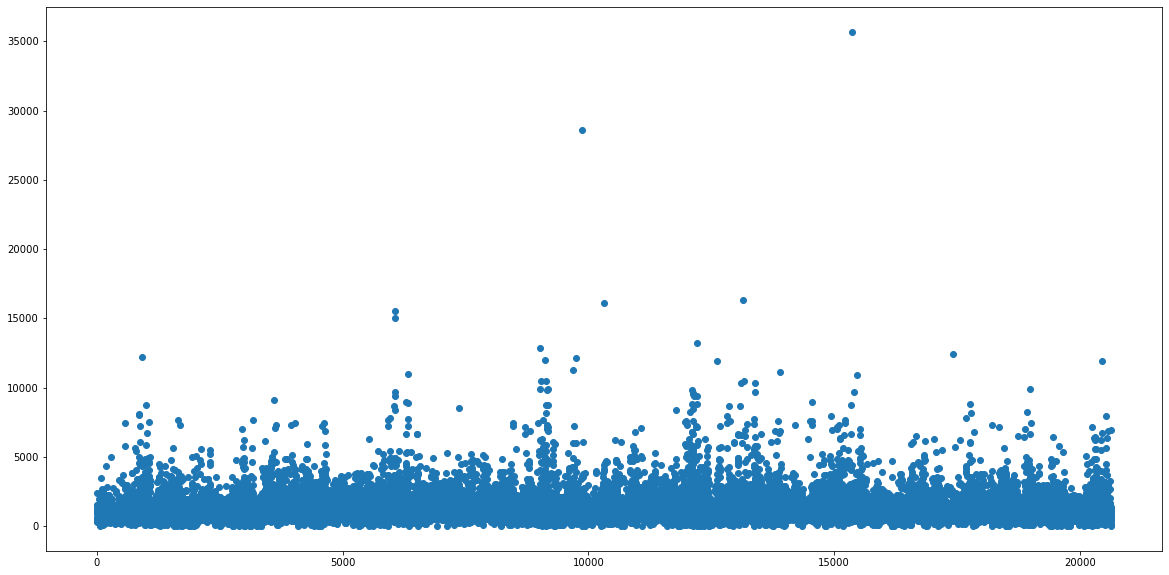

In [26]:
plt.figure(figsize = (20,10))
plt.scatter(hpc.index, hpc['population'])
plt.show()

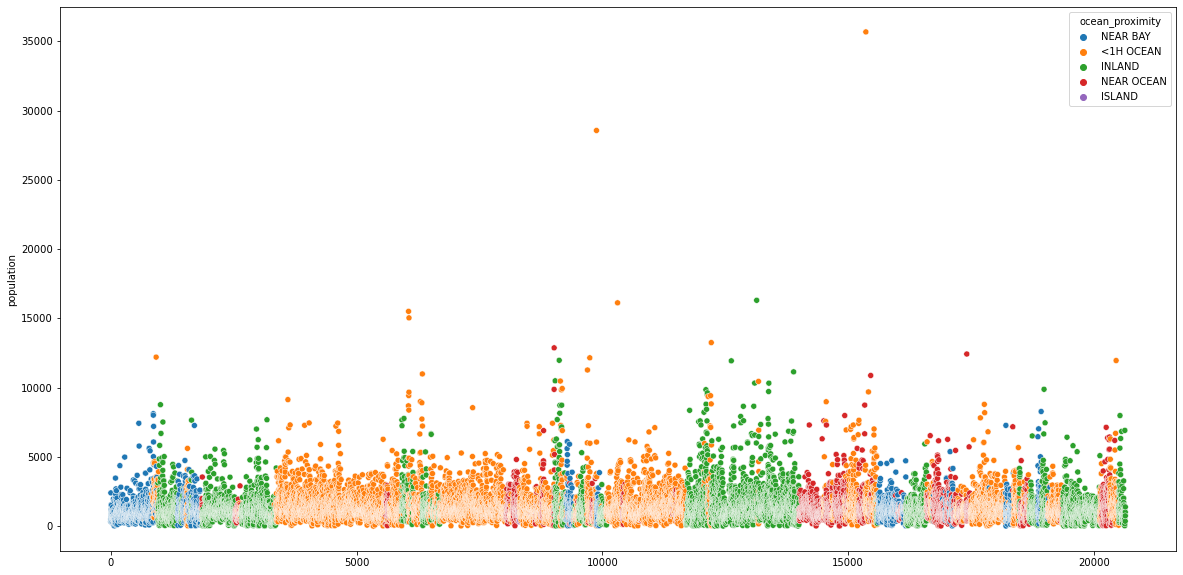

In [27]:
plt.figure(figsize = (20,10))
sns.scatterplot(x=hpc.index, y=hpc['population'], hue=hpc['ocean_proximity'])
plt.show()

# Median_House_Values

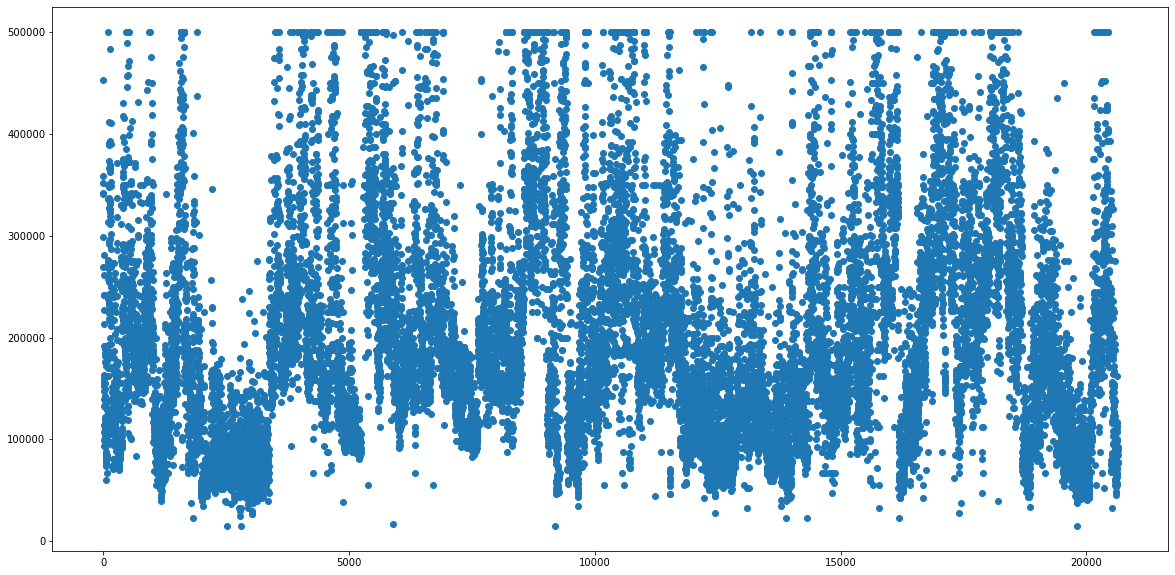

In [28]:
plt.figure(figsize = (20,10))
plt.scatter(hpc.index, hpc['median_house_value'])
plt.show()

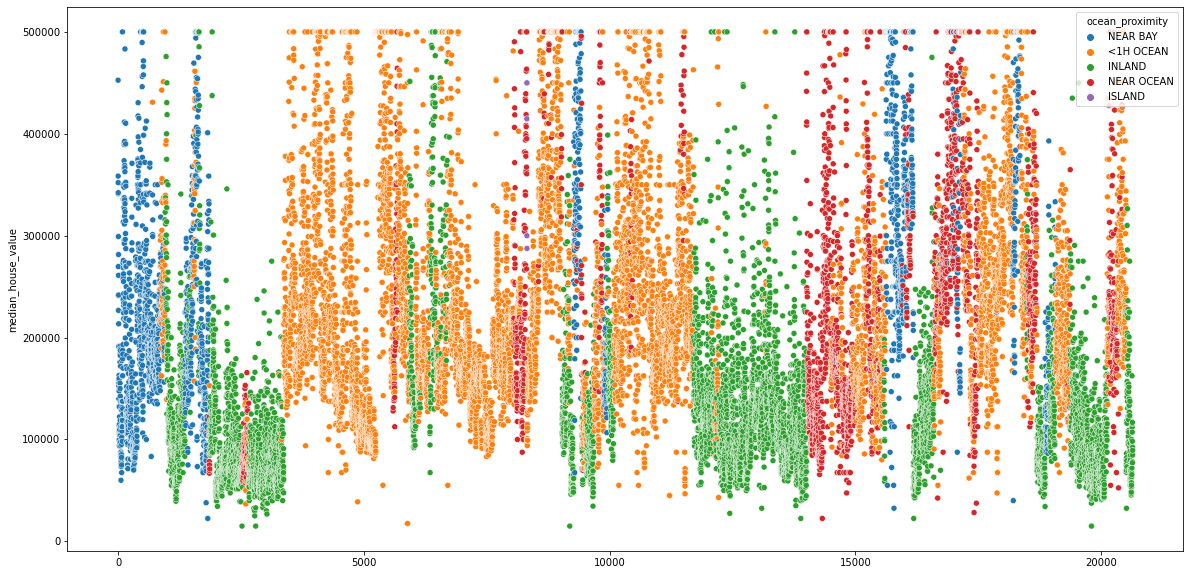

In [29]:
plt.figure(figsize=(20,10))
sns.scatterplot(x=hpc.index, y=hpc['median_house_value'], hue = hpc['ocean_proximity'])
plt.show()

## house_holds

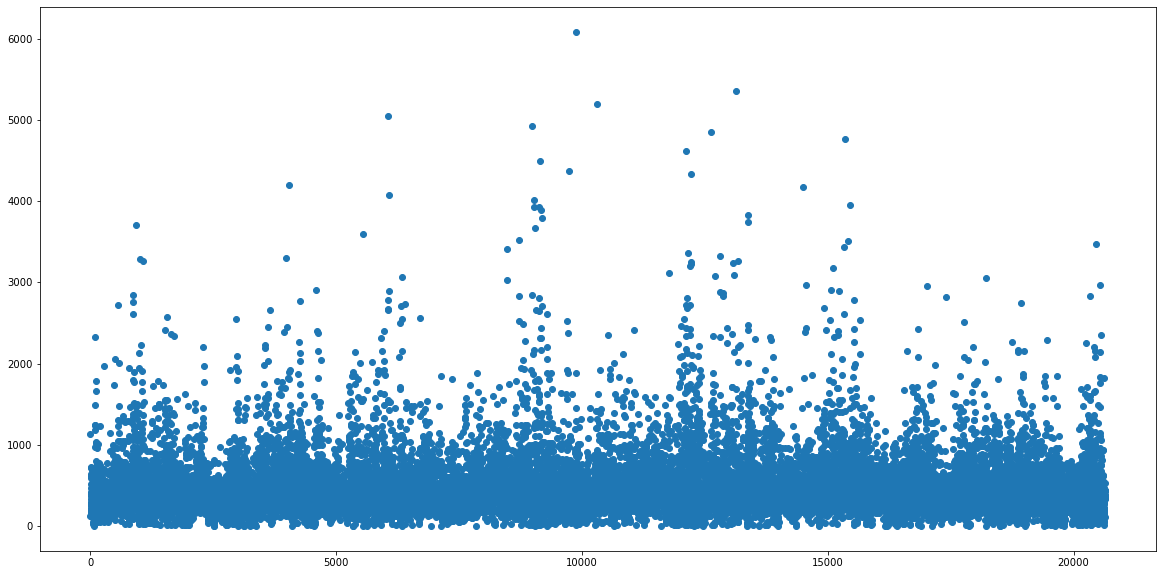

In [30]:
plt.figure(figsize=(20,10))
plt.scatter(hpc.index,hpc['households'])
plt.show()

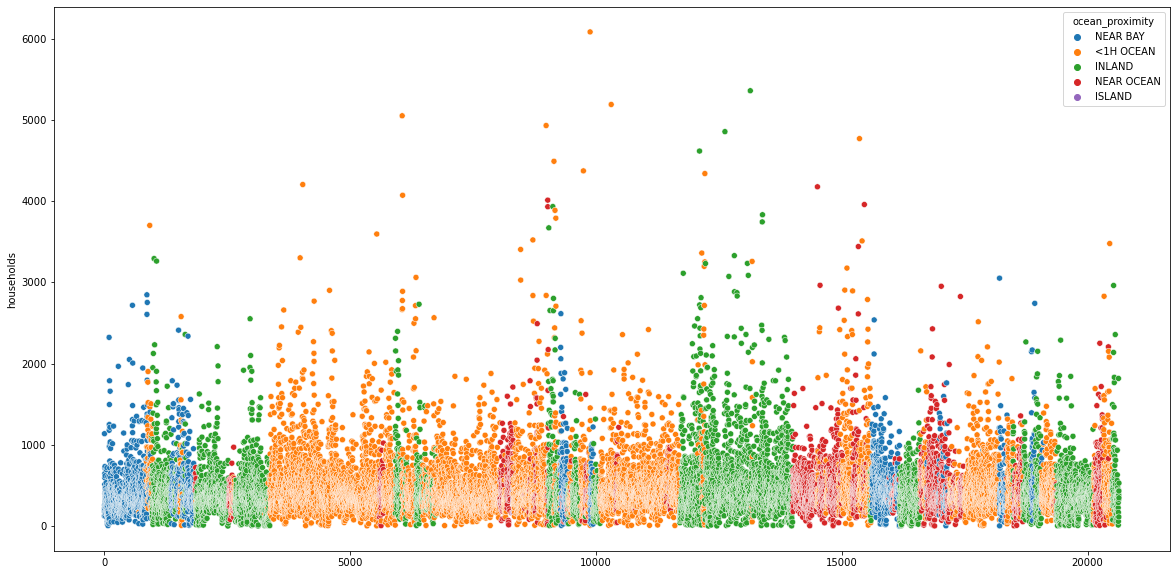

In [31]:
plt.figure(figsize=(20,10))
sns.scatterplot(x=hpc.index, y=hpc['households'], hue=hpc['ocean_proximity'])
plt.show()

## total_rooms

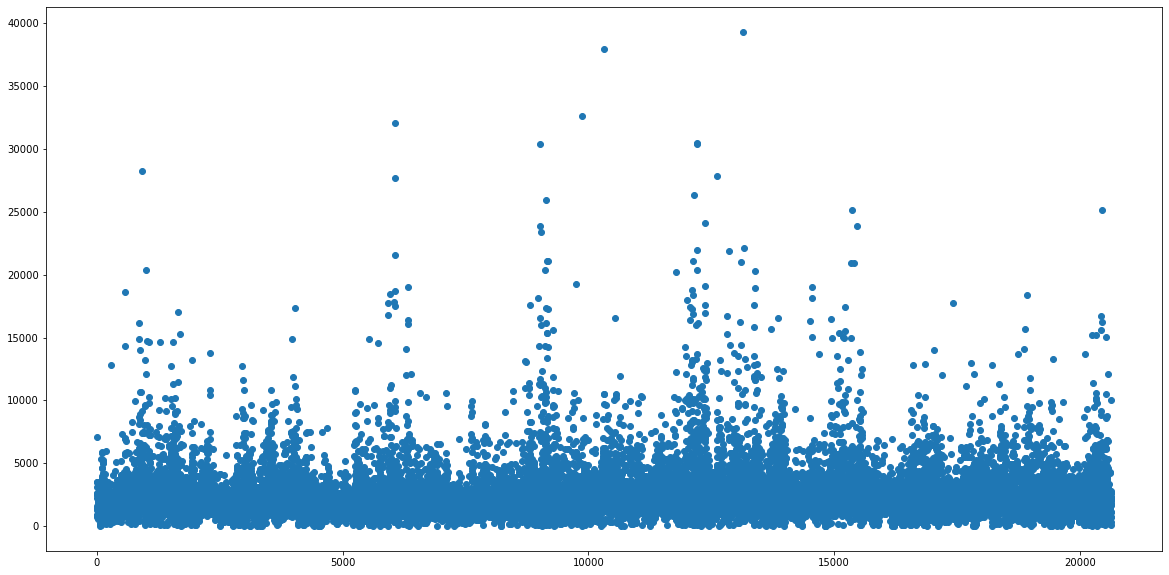

In [32]:
plt.figure(figsize=(20,10))
plt.scatter(hpc.index,hpc['total_rooms'])
plt.show()

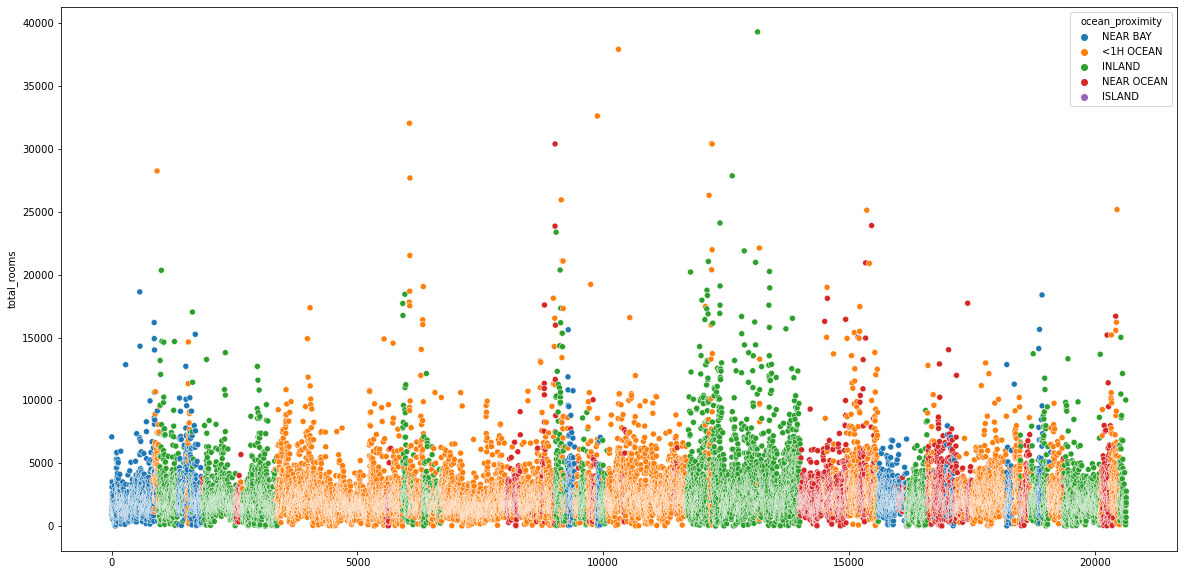

In [33]:
plt.figure(figsize=(20,10))
sns.scatterplot(x=hpc.index, y=hpc['total_rooms'], hue=hpc['ocean_proximity'])
plt.show()

## house_median_age

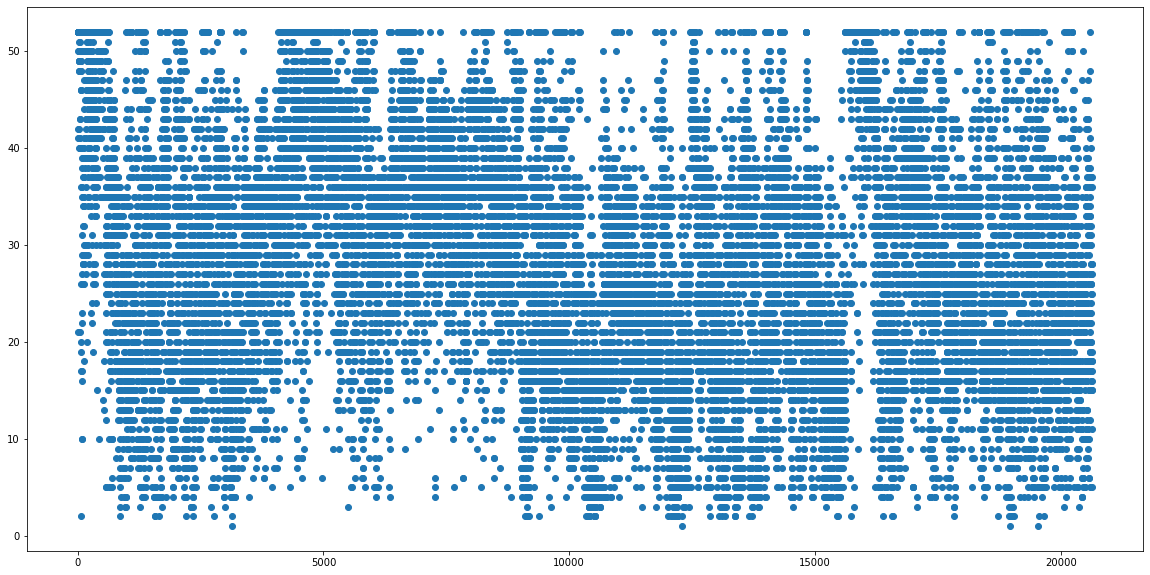

In [34]:
plt.figure(figsize=(20,10))
plt.scatter(hpc.index,hpc['housing_median_age'])
plt.show()

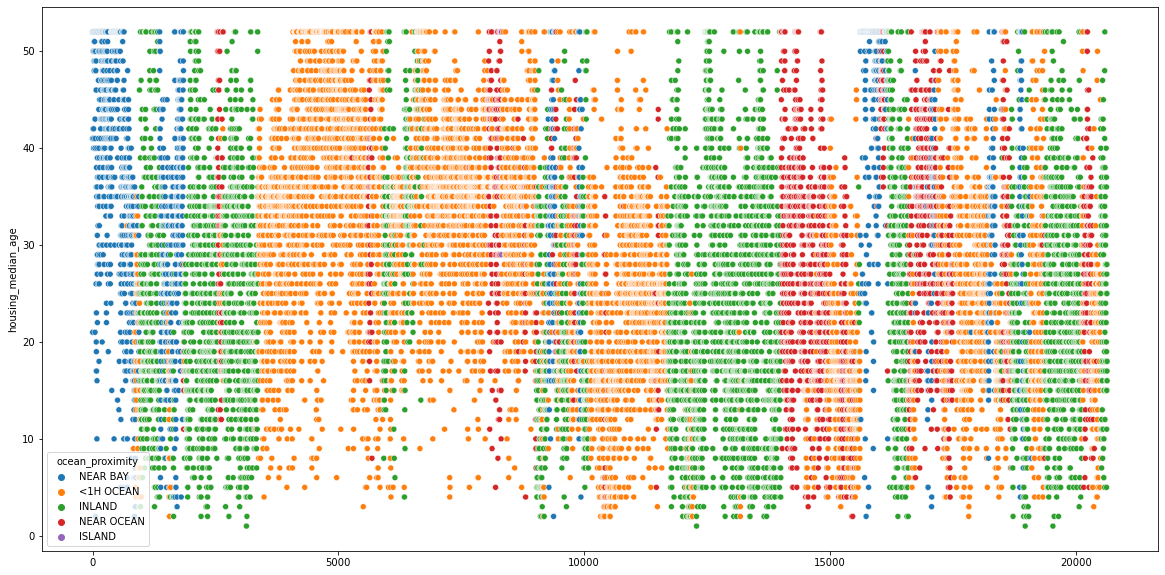

In [35]:
plt.figure(figsize = (20,10))
sns.scatterplot(x=hpc.index, y=hpc['housing_median_age'], hue=hpc['ocean_proximity'])
plt.show()

## total_bedrooms

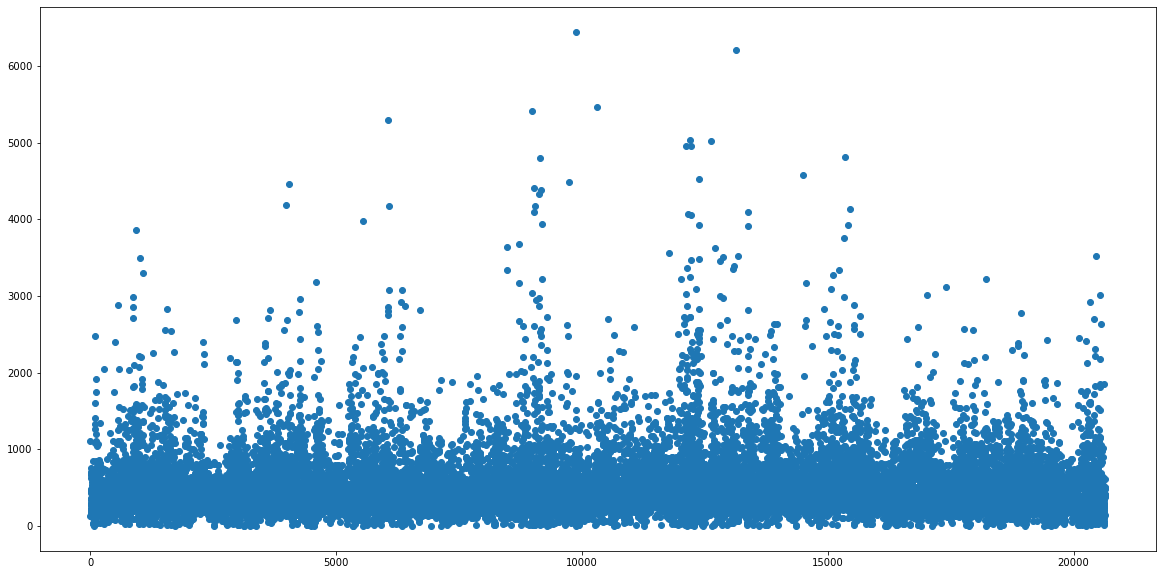

In [36]:
plt.figure(figsize=(20,10))
plt.scatter(hpc.index,hpc['total_bedrooms'])
plt.show()

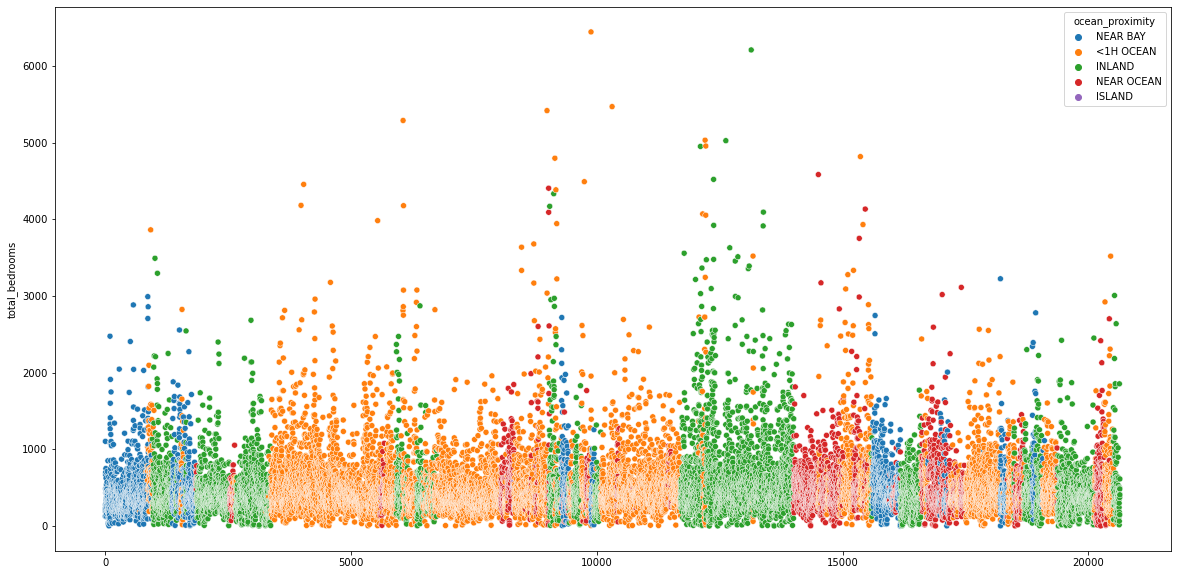

In [37]:
plt.figure(figsize = (20,10))
sns.scatterplot(x=hpc.index, y=hpc['total_bedrooms'], hue=hpc['ocean_proximity'])
plt.show()

## Longitude

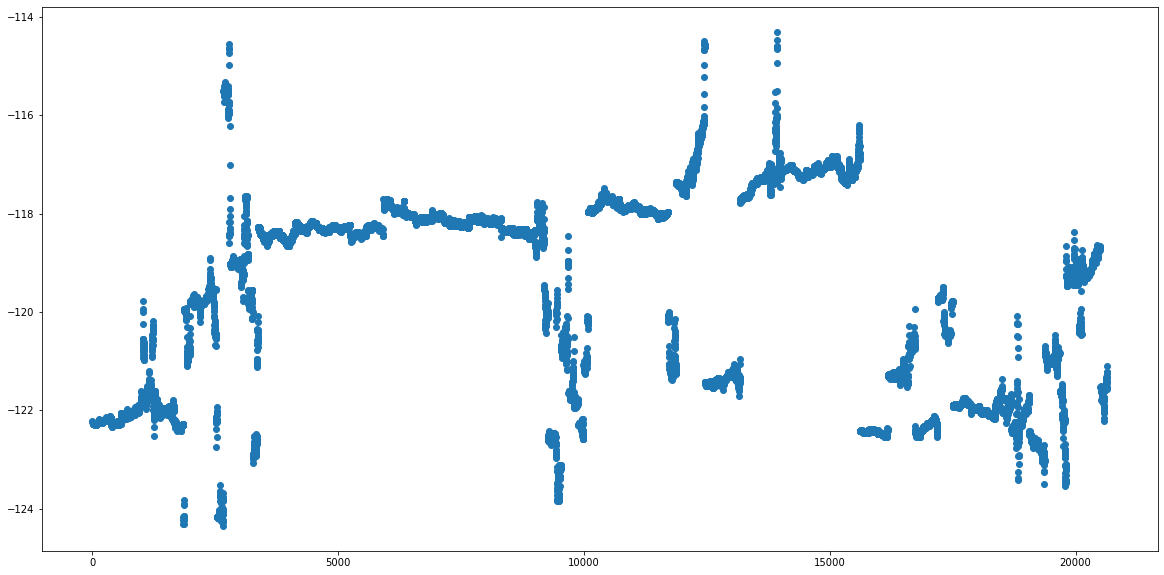

In [38]:
plt.figure(figsize=(20,10))
plt.scatter(hpc.index,hpc['longitude'])
plt.show()

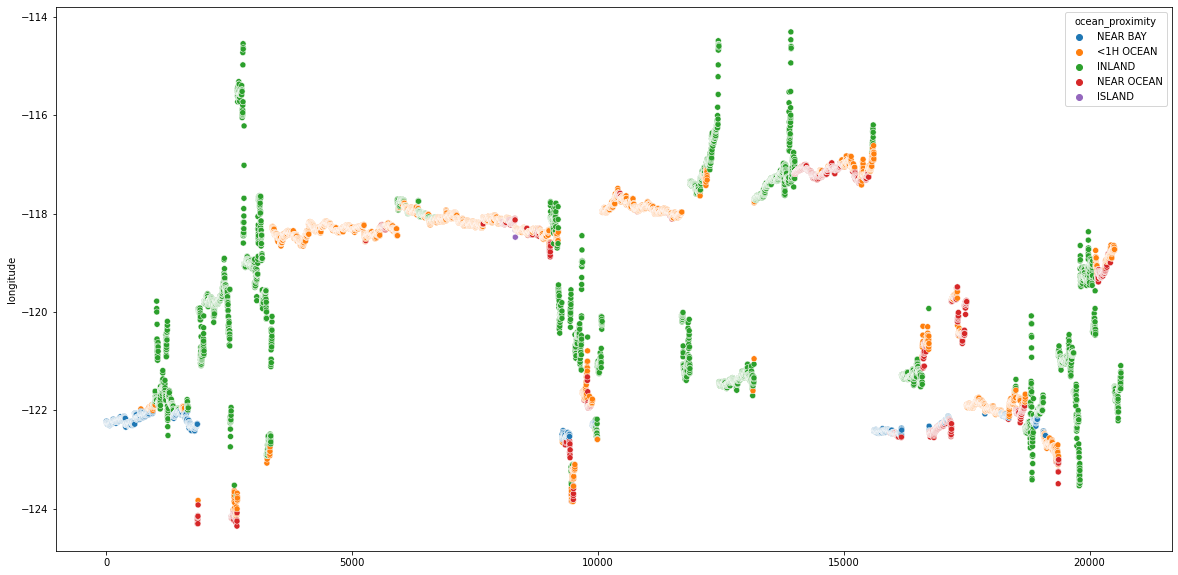

In [39]:
plt.figure(figsize = (20,10))
sns.scatterplot(x=hpc.index, y=hpc['longitude'], hue=hpc['ocean_proximity'])
plt.show()

## Latitude

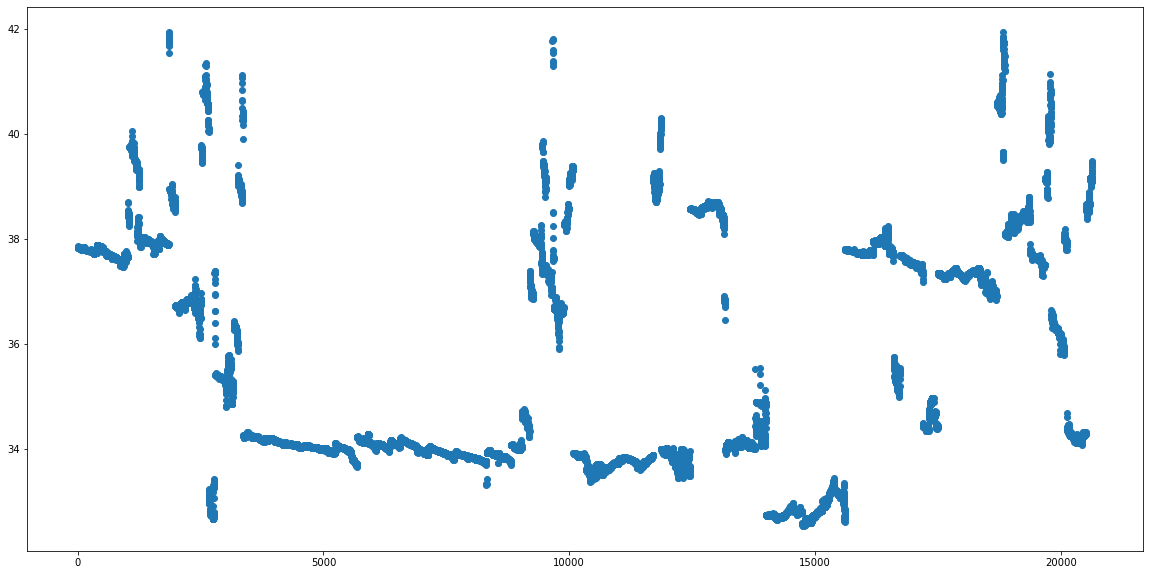

In [40]:
plt.figure(figsize=(20,10))
plt.scatter(hpc.index, hpc['latitude'])
plt.show()

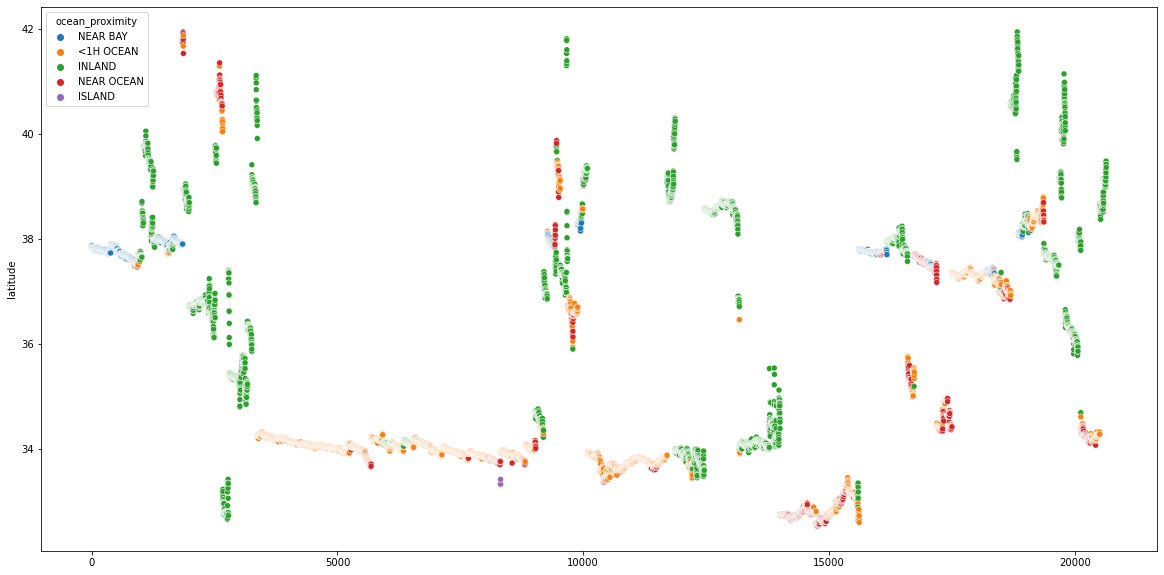

In [41]:
plt.figure(figsize = (20,10))
sns.scatterplot(x=hpc.index, y=hpc['latitude'], hue=hpc['ocean_proximity'])
plt.show()

## Median_Income

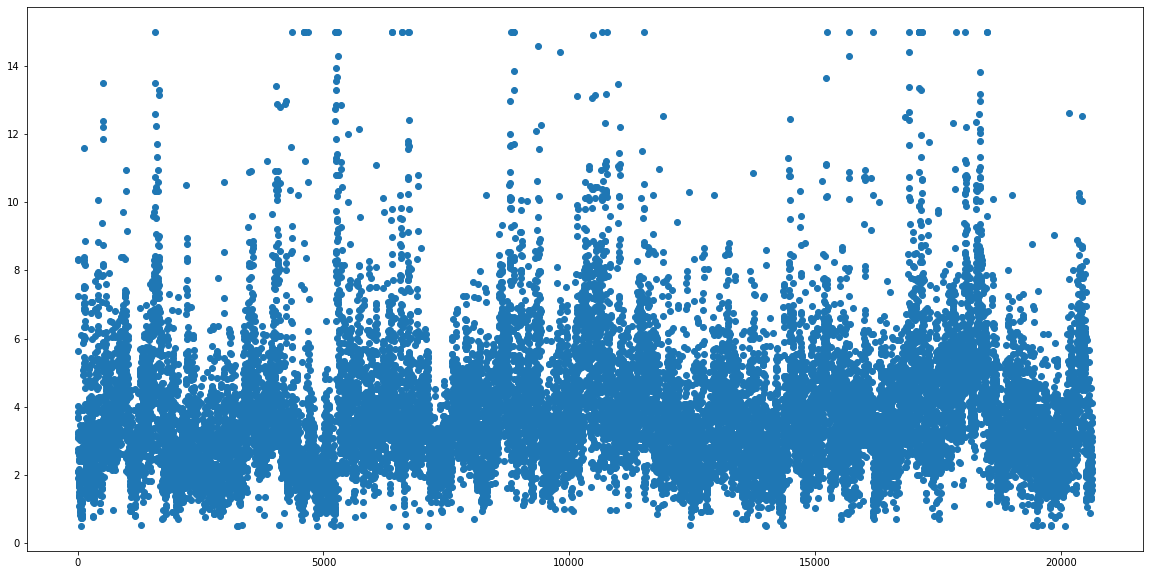

In [42]:
plt.figure(figsize=(20,10))
plt.scatter(hpc.index, hpc['median_income'])
plt.show()

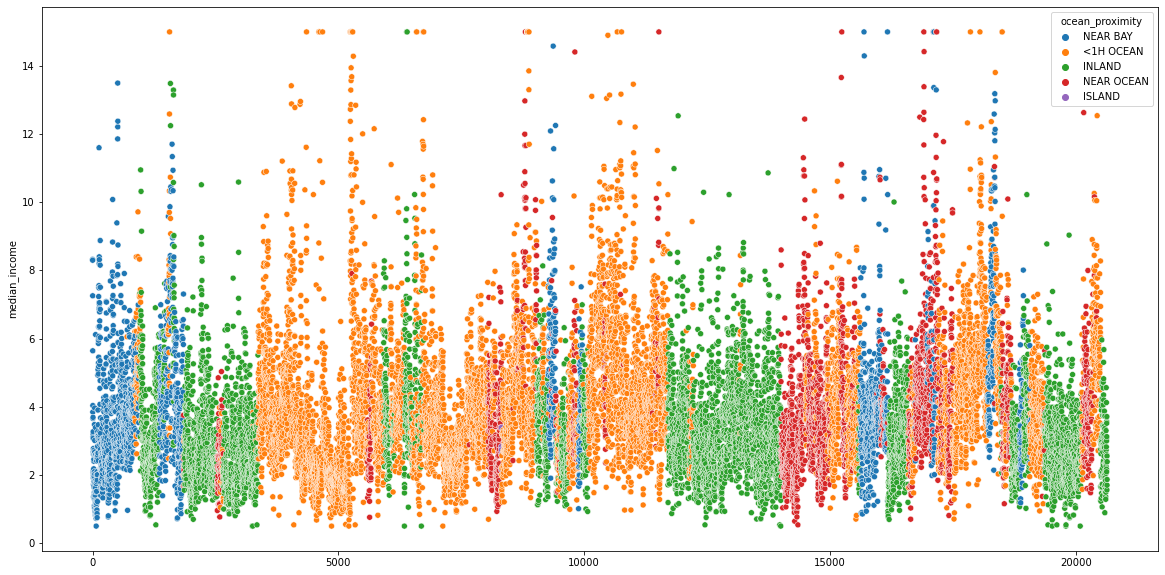

In [43]:
plt.figure(figsize = (20,10))
sns.scatterplot(x=hpc.index, y=hpc['median_income'], hue=hpc['ocean_proximity'])
plt.show()

## KDE Plot

The 'kernal density estimate' plot creates a smooth version of a histogram by nomalizing all points to appear under one curve

### Population

<AxesSubplot:xlabel='population', ylabel='Density'>

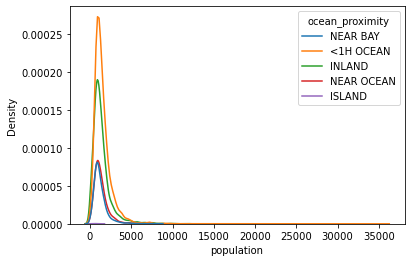

In [44]:
sns.kdeplot(x='population',data=hpc, hue='ocean_proximity')

## housing median age

<AxesSubplot:xlabel='housing_median_age', ylabel='Density'>

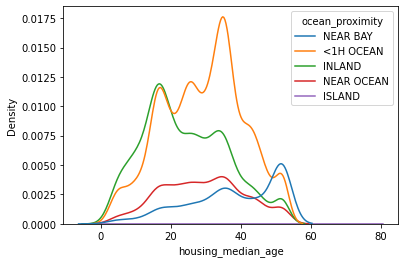

In [45]:
sns.kdeplot(x='housing_median_age', data=hpc, hue = 'ocean_proximity')

## households

<AxesSubplot:xlabel='households', ylabel='Density'>

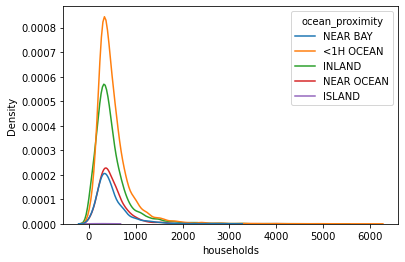

In [46]:
sns.kdeplot(x='households', data=hpc, hue = 'ocean_proximity')

## median_income

<AxesSubplot:xlabel='median_income', ylabel='Density'>

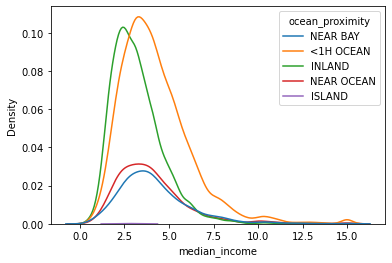

In [47]:
sns.kdeplot(x='median_income', data=hpc, hue = 'ocean_proximity')

### Longitude

<AxesSubplot:xlabel='longitude', ylabel='Density'>

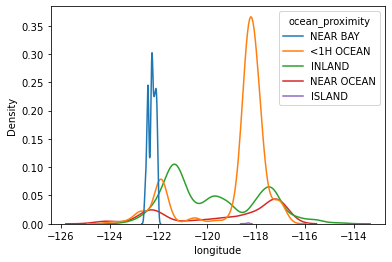

In [48]:
sns.kdeplot(x='longitude', data=hpc, hue = 'ocean_proximity')

## Latitude

<AxesSubplot:xlabel='latitude', ylabel='Density'>

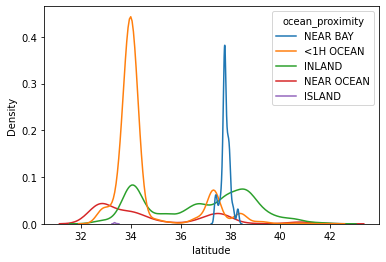

In [49]:
sns.kdeplot(x='latitude', data=hpc, hue = 'ocean_proximity')

### Total_rooms

<AxesSubplot:xlabel='total_rooms', ylabel='Density'>

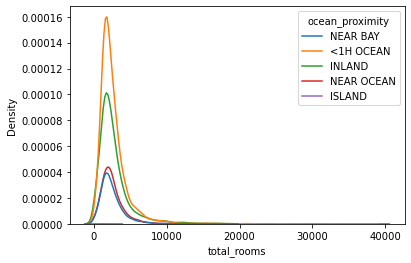

In [50]:
sns.kdeplot(x='total_rooms', data=hpc, hue = 'ocean_proximity')

# Visualizing the categorical variables

## Bar Chart

A bar graph is a graphical representation of information. It uses bars that extend to different heights to depict value. Bar graphs can be created with vertical bars, horizontal bars, grouped bars (multiple bars that compare values in a category), or stacked bars (bars containing multiple types of information).

The plt.bar() function plots a bar plot of a categorical variable. The value_counts() returns a series containing the counts of unique_values in the variable.

### Barchart on Classes

<AxesSubplot:>

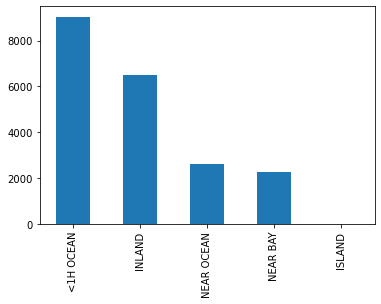

In [51]:
hpc['ocean_proximity'].value_counts().plot.bar()

# Pie chart

A pie chart, sometimes called a circle chart, is a way of summarizing a set of nominal data or displaying the different values of a given variable

([<matplotlib.patches.Wedge at 0x7fa4b05f0f10>,
 [Text(-1.1802215523424562, 0.21697254984528144, 'Near Bay'),
  Text(0.6526238402111609, -0.8854841179761709, '<1H Ocean'),
  Text(0.9821298675100836, 0.4953997611471222, 'Inland'),
  Text(0.37775790801863873, 1.033101622750338, 'Near Ocean'),
  Text(0.0008455078578293421, 1.0999996750528895, 'Island')],
 [Text(-0.688462572199766, 0.12656732074308083, '44.2%'),
  Text(0.35597664011517866, -0.4829913370779113, '31.8%'),
  Text(0.5357072004600455, 0.2702180515347939, '12.9%'),
  Text(0.20604976801016658, 0.5635099760456389, '11.1%'),
  Text(0.0004611861042705502, 0.5999998227561215, '0.0%')])

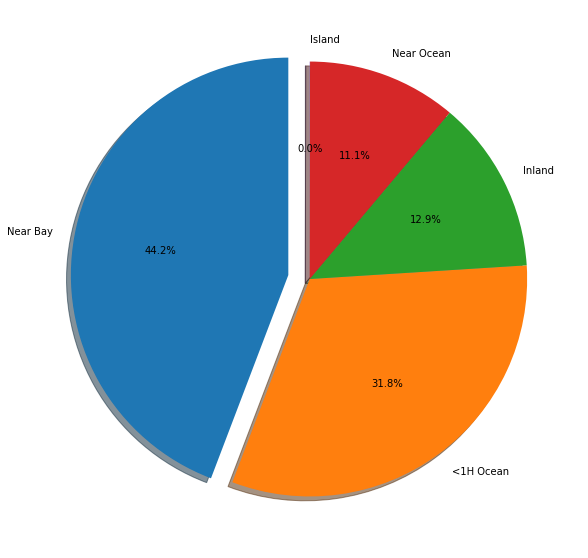

In [52]:
plt.figure(figsize=(20,10))
plt.pie(hpc['ocean_proximity'].value_counts(),labels=['Near Bay','<1H Ocean','Inland','Near Ocean','Island'],
        autopct='%1.1f%%', explode =(0.1,0.0,0.0,0.0,0.0),shadow = True, startangle=90)



Checking multicolinearity in Numerical Features

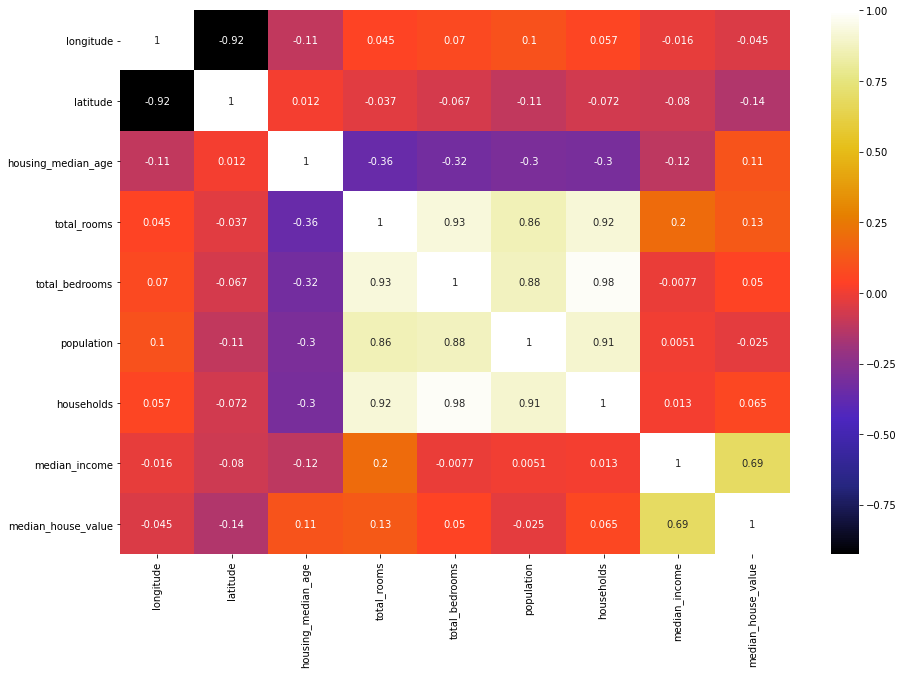

In [53]:
plt.figure(figsize=(15,10))
sns.heatmap(hpc.corr(),cmap="CMRmap", annot=True)
plt.show()

There is a strong relation between median_values,median_income, total_rooms & housing_median_age 

In [54]:
hpc.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')

## label Encoding

Encode target labels with value between 0 and n_classes-1.

This transformer should be used to encode target values, i.e. y, and not the input X.

In [55]:
from sklearn import preprocessing
ocean_le = preprocessing.LabelEncoder()

In [56]:
hpc['ocean_proximity'] = ocean_le.fit_transform(hpc['ocean_proximity'])

In [57]:
ocean_le.classes_

array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
      dtype=object)

In [58]:
hpc

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0        -122.23     37.88                41.0        880.0           129.0   
1        -122.22     37.86                21.0       7099.0          1106.0   
2        -122.24     37.85                52.0       1467.0           190.0   
3        -122.25     37.85                52.0       1274.0           235.0   
4        -122.25     37.85                52.0       1627.0           280.0   
...          ...       ...                 ...          ...             ...   
20635    -121.09     39.48                25.0       1665.0           374.0   
20636    -121.21     39.49                18.0        697.0           150.0   
20637    -121.22     39.43                17.0       2254.0           485.0   
20638    -121.32     39.43                18.0       1860.0           409.0   
20639    -121.24     39.37                16.0       2785.0           616.0   

       population  households  median_income  median_house_value  \
0           322.0       126.0         8.3252            452600.0   
1          2401.0      1138.0         8.3014            358500.0   
2           496.0       177.0         7.2574            352100.0   
3           558.0       219.0         5.6431            341300.0   
4           565.0       259.0         3.8462            342200.0   
...           ...         ...            ...                 ...   
20635       845.0       330.0         1.5603             78100.0   
20636       356.0       114.0         2.5568             77100.0   
20637      1007.0       433.0         1.7000             92300.0   
20638       741.0       349.0         1.8672             84700.0   
20639      1387.0       530.0         2.3886             89400.0   

       ocean_proximity  
0                    3  
1                    3  
2                    3  
3                    3  
4                    3  
...                ...  
20635                1  
20636                1  
20637                1  
20638                1  
20639                1  

[20433 rows x 10 columns]

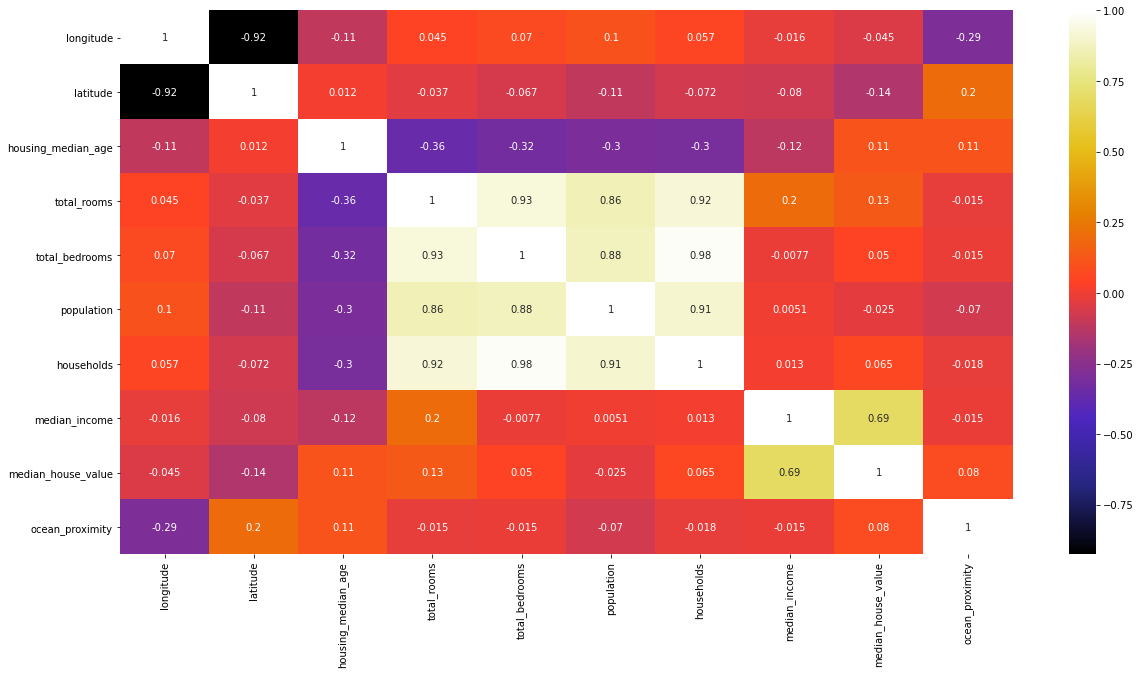

In [59]:
plt.figure(figsize=(20,10))
sns.heatmap(hpc.corr(),annot=True, cmap='CMRmap')
plt.show()

In [60]:
hpc.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')

In [61]:
shpc = hpc[['housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'ocean_proximity','median_house_value']]
shpc

housing_median_age  total_rooms  total_bedrooms  population  \
0                    41.0        880.0           129.0       322.0   
1                    21.0       7099.0          1106.0      2401.0   
2                    52.0       1467.0           190.0       496.0   
3                    52.0       1274.0           235.0       558.0   
4                    52.0       1627.0           280.0       565.0   
...                   ...          ...             ...         ...   
20635                25.0       1665.0           374.0       845.0   
20636                18.0        697.0           150.0       356.0   
20637                17.0       2254.0           485.0      1007.0   
20638                18.0       1860.0           409.0       741.0   
20639                16.0       2785.0           616.0      1387.0   

       households  median_income  ocean_proximity  median_house_value  
0           126.0         8.3252                3            452600.0  
1          1138.0         8.3014                3            358500.0  
2           177.0         7.2574                3            352100.0  
3           219.0         5.6431                3            341300.0  
4           259.0         3.8462                3            342200.0  
...           ...            ...              ...                 ...  
20635       330.0         1.5603                1             78100.0  
20636       114.0         2.5568                1             77100.0  
20637       433.0         1.7000                1             92300.0  
20638       349.0         1.8672                1             84700.0  
20639       530.0         2.3886                1             89400.0  

[20433 rows x 8 columns]

In [62]:
x=shpc.drop(['median_house_value'], axis=1).values
y=shpc['median_house_value'].values

In [63]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.25, random_state=42)

In [64]:
x_train

array([[1.1000e+01, 8.7390e+03, 2.1900e+03, ..., 1.9190e+03, 1.7109e+00,
        1.0000e+00],
       [1.8000e+01, 2.4130e+03, 5.3300e+02, ..., 5.5100e+02, 2.4567e+00,
        0.0000e+00],
       [2.7000e+01, 1.6750e+03, 5.2100e+02, ..., 3.3100e+02, 2.1579e+00,
        2.0000e+00],
       ...,
       [4.2000e+01, 1.5940e+03, 3.6900e+02, ..., 3.6200e+02, 3.0990e+00,
        0.0000e+00],
       [1.2000e+01, 5.7190e+03, 1.0640e+03, ..., 1.0570e+03, 5.2879e+00,
        3.0000e+00],
       [5.2000e+01, 3.6020e+03, 7.3800e+02, ..., 6.4700e+02, 3.8934e+00,
        3.0000e+00]])

In [65]:
x_train.shape

(15324, 7)

In [66]:
y_train.shape

(15324,)

## Scaling using Robust Scaler

In [67]:
from sklearn.preprocessing import RobustScaler
ro_scaler = RobustScaler()

In [68]:
x_train = ro_scaler.fit_transform(x_train)
x_test = ro_scaler.fit_transform(x_test)

In [69]:
x_train.shape
x_train

array([[-0.94736842,  3.94809069,  5.04885057, ...,  4.70716511,
        -0.8363678 ,  0.        ],
       [-0.57894737,  0.17362768,  0.28735632, ...,  0.44548287,
        -0.49519671, -1.        ],
       [-0.10526316, -0.26670644,  0.25287356, ..., -0.23987539,
        -0.63188472,  1.        ],
       ...,
       [ 0.68421053, -0.3150358 , -0.18390805, ..., -0.14330218,
        -0.20137237, -1.        ],
       [-0.89473684,  2.14618138,  1.81321839, ...,  2.02180685,
         0.79995425,  2.        ],
       [ 1.21052632,  0.88305489,  0.87643678, ...,  0.74454829,
         0.16203111,  2.        ]])

# Regression Modeling

In [70]:
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score 
from sklearn import linear_model
from sklearn.metrics import mean_absolute_error , mean_absolute_percentage_error , mean_squared_error
import statsmodels.api as sm

In [71]:
reg = linear_model.LinearRegression()

In [72]:
reg.fit(x_train,y_train)

LinearRegression()

In [73]:
reg.score(x_train,y_train)

0.5655860379493766

In [74]:
reg.score(x_test,y_test)

0.580542864472876

In [76]:
print(reg.coef_)


[ 34845.67977807 -33894.73141411  36732.25234505 -29757.04206374
  36346.64676682 104205.91497405   3836.94120612]
